In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import clear_output
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from scipy.stats import randint, uniform
import xgboost as xgb
import process_data
import classifier
%matplotlib inline

/Library/Python/2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [26]:
# Load data
df_x, x, y = classifier.load_data('output_7.pkl')

print df_x.columns.values[:30]  # print the first 30 columns

['home_start_p1_FG3_PCT' 'home_start_p1_FG_PCT' 'home_start_p1_FT_PCT'
 'home_start_p1_MIN' 'home_start_p1_PF' 'home_start_p1_PLUS_MINUS'
 'home_start_p1_PTS' 'home_start_p1_3PAr' 'home_start_p1_ASTr'
 'home_start_p1_BLKr' 'home_start_p1_DRBr' 'home_start_p1_DRtg'
 'home_start_p1_DWS' 'home_start_p1_FTr' 'home_start_p1_ORBr'
 'home_start_p1_ORtg' 'home_start_p1_OWS' 'home_start_p1_STLr'
 'home_start_p1_TOVr' 'home_start_p1_TRBr' 'home_start_p1_TS'
 'home_start_p1_USGr' 'home_start_p1_WS' 'home_start_p1_WS48'
 'home_start_p1_atb3_freq' 'home_start_p1_atb3_pps' 'home_start_p1_c3_freq'
 'home_start_p1_c3_pps' 'home_start_p1_mid_freq' 'home_start_p1_mid_pps']


In [27]:
# create pipeline
selection = SelectKBest(f_classif, k=120)
clf = ExtraTreesClassifier(n_estimators=1500, n_jobs=-1, min_samples_split=6, min_samples_leaf=3, random_state=3333)
pipeline = make_pipeline(selection, clf)
kf = KFold(len(df_x.index), n_folds=5, shuffle=True, random_state=12323)

In [30]:
params = {'max_depth': 6, 'eta': 0.005, 'silent': 1, 'objective': 'binary:logistic',
          'colsample_bytree': 0.3, 'min_child_weight': 37, 'seed': 233, 'gamma': 4}

xgb_clf = xgb.XGBClassifier(n_estimators=250, learning_rate=0.005, max_depth=6, 
                        colsample_bytree=0.3, min_child_weight=37, seed=233, gamma=4)
colnames = df_x.columns.values
xgb_clf = xgb_clf.fit(x,y)

In [43]:
    outfile = open('xgb.fmap', 'w')

    for i, feat in enumerate(colnames):
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))

    outfile.close()

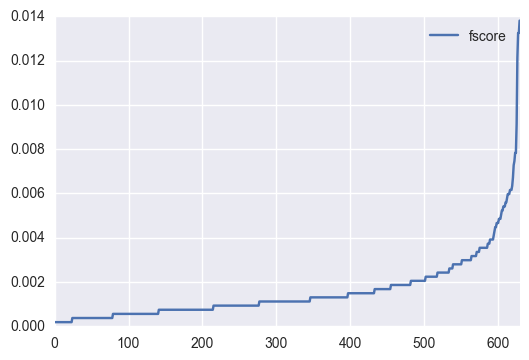

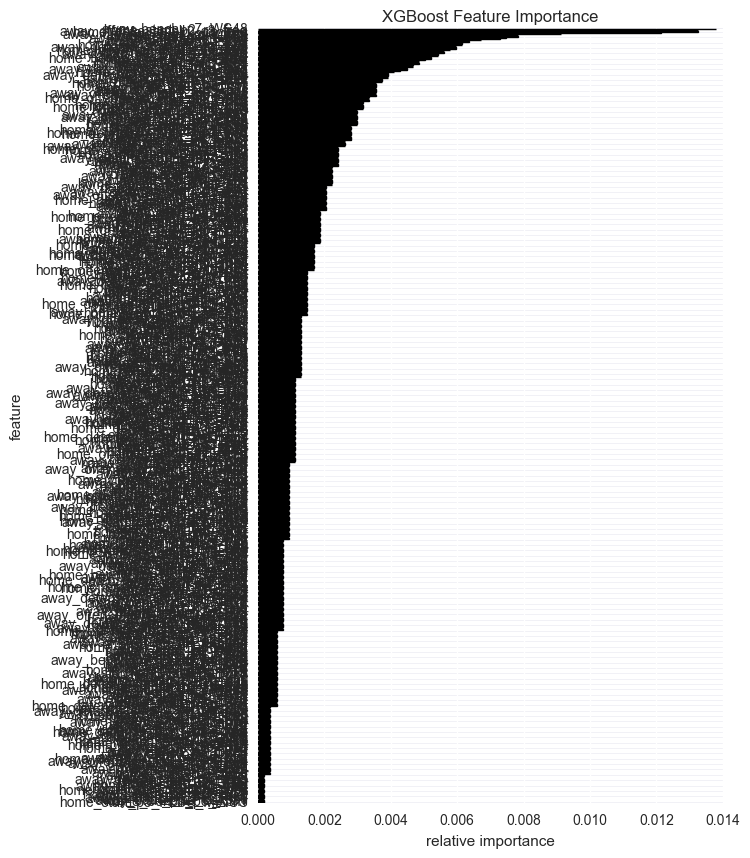

In [44]:
import operator
dtrain = xgb.DMatrix(x, label=y)
gbdt = xgb.train(params, dtrain, 250)

In [50]:
importance = gbdt.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

print df.head(1)

              feature    fscore
0  away_bench_p7_WS48  0.013803


In [51]:
df.to_csv('importances.csv')

In [7]:
# perform crossval
scores = cross_val_score(pipeline, x, y, cv=kf, verbose=10)
print scores
print scores.mean()

[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.536030 -  26.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.528866 -  29.0s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   27.2s
[Parallel(n_jobs=1)]: Done   2 jobs       | elapsed:   56.9s



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.518753 -  24.8s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.533502 -  27.4s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.516442 -  29.1s
[ 0.53603034  0.52886641  0.51875263  0.5335019   0.51644182]
0.526718621308


[Parallel(n_jobs=1)]: Done   5 jobs       | elapsed:  2.3min
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.3min finished


In [13]:
dtrain = xgb.DMatrix(x, label=y)

param = {'max_depth': 6, 'eta': 0.005, 'silent': 1, 'objective': 'binary:logistic', 
         'colsample_bytree': 0.3, 'min_child_weight': 37, 'seed': 233, 'gamma': 4}
num_round = 250

cvresults = xgb.cv(param, dtrain, num_round, nfold=5, seed=12323, show_progress=False)

print 'TEST ERROR = ' + str(cvresults['test-error-mean'].values[-1])
print 'TRAIN ERROR = ' + str(cvresults['train-error-mean'].values[-1])

TEST ERROR = 0.4672852
TRAIN ERROR = 0.2509696


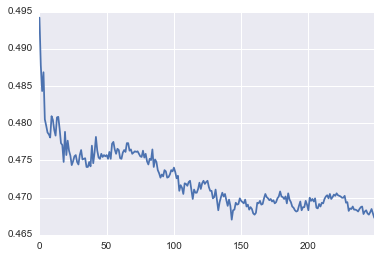

In [14]:
cvresults['test-error-mean'].plot()

In [16]:
# Load data
df_x, x, y = classifier.load_data('output_14yrs.pkl')

print df_x.columns.values[:30]  # print the first 30 columns

['home_start_p1_FG3_PCT' 'home_start_p1_FG_PCT' 'home_start_p1_FT_PCT'
 'home_start_p1_MIN' 'home_start_p1_PF' 'home_start_p1_PLUS_MINUS'
 'home_start_p1_PTS' 'home_start_p1_3PAr' 'home_start_p1_ASTr'
 'home_start_p1_BLKr' 'home_start_p1_DRBr' 'home_start_p1_DRtg'
 'home_start_p1_DWS' 'home_start_p1_FTr' 'home_start_p1_ORBr'
 'home_start_p1_ORtg' 'home_start_p1_OWS' 'home_start_p1_STLr'
 'home_start_p1_TOVr' 'home_start_p1_TRBr' 'home_start_p1_TS'
 'home_start_p1_USGr' 'home_start_p1_WS' 'home_start_p1_WS48'
 'home_start_p1_atb3_freq' 'home_start_p1_atb3_pps' 'home_start_p1_c3_freq'
 'home_start_p1_c3_pps' 'home_start_p1_mid_freq' 'home_start_p1_mid_pps']


In [19]:
# create pipeline
selection = SelectKBest(f_classif, k=120)
clf = ExtraTreesClassifier(n_estimators=2000, n_jobs=-1, min_samples_split=6, min_samples_leaf=3, random_state=3333)
pipeline = make_pipeline(selection, clf)
kf = KFold(len(df_x.index), n_folds=5, shuffle=True, random_state=12323)

print 'pipeline created'

pipeline created


In [20]:
# perform crossval
scores = cross_val_score(pipeline, x, y, cv=kf, verbose=10)
print scores
print scores.mean()

[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.518285 -  53.1s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.508976 -  53.7s

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   54.4s
[Parallel(n_jobs=1)]: Done   2 jobs       | elapsed:  1.8min



[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.524269 -  44.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.509478 -  43.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.518124 -  47.5s
[ 0.51828457  0.50897606  0.52426862  0.50947788  0.51812438]
0.515826303342


[Parallel(n_jobs=1)]: Done   5 jobs       | elapsed:  4.2min
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.2min finished


In [21]:
dtrain = xgb.DMatrix(x, label=y)

param = {'max_depth': 6, 'eta': 0.005, 'silent': 1, 'objective': 'binary:logistic', 
         'colsample_bytree': 0.3, 'min_child_weight': 37, 'seed': 233, 'gamma': 4}
num_round = 250

cvresults = xgb.cv(param, dtrain, num_round, nfold=5, seed=12323, show_progress=False)

print 'TEST ERROR = ' + str(cvresults['test-error-mean'].values[-1])
print 'TRAIN ERROR = ' + str(cvresults['train-error-mean'].values[-1])

TEST ERROR = 0.4819422
TRAIN ERROR = 0.249817


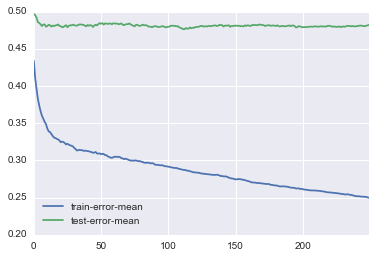

In [24]:
cvresults[['train-error-mean', 'test-error-mean']].plot()

In [25]:
df_x.head(3200).to_csv('visual_check.csv')

In [ ]:
classifiers = []
transformers = []

for train_index, test_index in kf:
    print 'Training...'
        x_train = x[train_index]
        y_train = y[train_index]
        x_test = x[test_index]
        y_test = y[test_index]
        ensemble_preds = []
        
        for transformer, clf in zip(classifiers):
            if transformer:
                fitted_transformer = transformer.fit(x_train, y_train)
                x_train_transform = fitted_transformer.transform(x_train)
                x_test_transform = fitted_transformer.transform(x_test)
            else:
                x_train_transform = x_train
                x_test_transform = x_test

            fitted_classifier = clf.fit(x_train_transform, y_train)
            
            preds = fitted_classifier.predict_proba(x_test)
            
            ensemble_preds.append(preds[:, 0])
            
        

        
            
                
        
                
                
        transformer